In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve   #画学习曲线的类
from sklearn.model_selection import ShuffleSplit    #设定交叉验证模式的类
from time import time
import datetime

In [3]:
def plot_learning_curve(estimator,title,X,y,ax,
                       ylim = None,     #设置纵坐标的取值范围
                       cv = None,
                       n_jobs = None     #设定所要使用的线程
                       ):
    train_sizes,train_scores,test_scores = learning_curve(estimator,X,y,cv = cv,n_jobs = n_jobs)
    
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel('Training examples')
    ax.set_ylabel('Score')
    ax.grid()
    ax.plot(train_sizes,np.mean(train_scores,axis = 1),'o-',color = 'r',label = 'Training Score')
    ax.plot(train_sizes,np.mean(test_scores,axis = 1),'o-',color = 'g',label = 'Test Score')
    ax.legend(loc = 'best')
    
    
    return ax

In [5]:
digits = load_digits()

X = digits.data
y = digits.target

title = ['Naivw Bays','Decision Tree','SVM RBF kernel','RandomForest','Logistic']
model = [GaussianNB(),DTC(),SVC(gamma = 0.001),RFC(n_estimators=50),LR(C = .1,solver='lbfgs')]
cv = ShuffleSplit(n_splits=50,test_size=0.2,random_state = 0)

Naivw Bays:00:01:100326
Decision Tree:00:01:057174
SVM RBF kernel:00:07:186820
RandomForest:00:11:052029
Logistic:00:12:104541


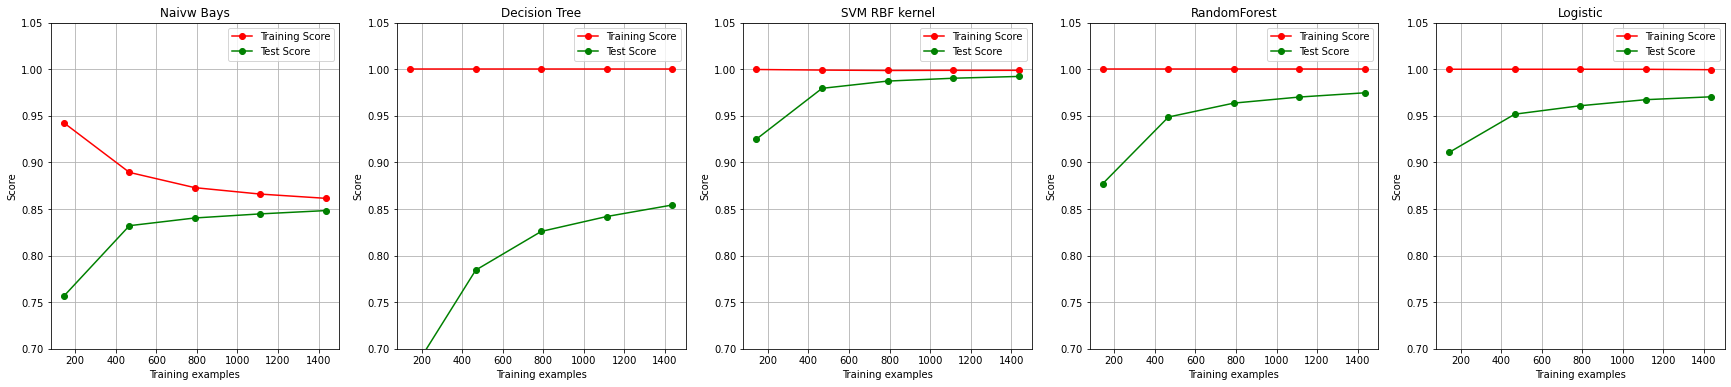

In [8]:
fig,ax = plt.subplots(1,5,figsize = (30,6))
for ind,title_,estimator in zip(range(len(title)),title,model):
    times = time()
    plot_learning_curve(estimator,title_,X,y,ax = ax[ind],ylim = [0.7,1.05],cv = cv,n_jobs = 4)
    print('{}:{}'.format(title_,datetime.datetime.fromtimestamp(time() - times).strftime('%M:%S:%f')))
    
plt.show()

In [9]:
[*zip(range(len(title)),title,model)]

[(0, 'Naivw Bays', GaussianNB()),
 (1, 'Decision Tree', DecisionTreeClassifier()),
 (2, 'SVM RBF kernel', SVC(gamma=0.001)),
 (3, 'RandomForest', RandomForestClassifier(n_estimators=50)),
 (4, 'Logistic', LogisticRegression(C=0.1))]